<a href="https://colab.research.google.com/github/PradeepCodeD/TransferLearningFiles/blob/main/ScopeFiles/Mode2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense , BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image
#from matplotlib import image
from numpy import asarray
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
Model - both norm enabled and SGD with effnet (learning rate scheduler programmed)

# TASK 2 : Clone & Explore dataset

In [6]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 52.44 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [7]:
#set the path to the main dir
import os
main_dir = '/content/datasets/Data'
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#set the path to the train norm dir
train_norm_dir = os.path.join(main_dir,'train_normalised')
os.mkdir(train_norm_dir)
#set the path to the test norm dir
test_norm_dir = os.path.join(main_dir,'test_normalised')
os.mkdir(test_norm_dir)

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
train_covid_normalised_dir = os.path.join(train_norm_dir,'COVID19')
os.mkdir(train_covid_normalised_dir)
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_normal_normalised_dir = os.path.join(train_norm_dir,'NORMAL')
os.mkdir(train_normal_normalised_dir)

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')
test_covid_normalised_dir = os.path.join(test_norm_dir,'COVID19')
os.mkdir(test_covid_normalised_dir)
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')
test_normal_normalised_dir = os.path.join(test_norm_dir,'NORMAL')
os.mkdir(test_normal_normalised_dir)


In [8]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(246).jpg', 'COVID19(497).jpg', 'COVID19(75).jpg', 'COVID19(299).jpg', 'COVID19(178).jpg', 'COVID19(140).jpg', 'COVID-19 (9).jpeg', 'COVID19(516).jpg', 'COVID19(354).jpg', 'COVID-19 (16).jpg']
['NORMAL(582).jpg', 'NORMAL(1061).jpg', 'NORMAL(1382).jpg', 'NORMAL(67).jpg', 'NORMAL(1227).jpg', 'NORMAL(892).jpg', 'NORMAL(1302).jpg', 'NORMAL(1481).jpg', 'NORMAL(703).jpg', 'NORMAL(305).jpg']
['COVID19(568).jpg', 'COVID-19 (773).jpg', 'COVID-19 (876).jpg', 'COVID-19 (439).jpg', 'COVID19(512).jpg', 'COVID19(35).jpg', 'COVID19(289).jpg', 'COVID-19 (353).jpg', 'COVID-19 (713).jpg', 'COVID19(100).jpg']
['NORMAL(1327).jpg', 'NORMAL(151).jpg', 'NORMAL(377).jpg', 'NORMAL(901).jpg', 'NORMAL(275).jpg', 'NORMAL(1344).jpg', 'NORMAL(99).jpg', 'NORMAL(219).jpg', 'NORMAL(181).jpg', 'NORMAL(586).jpg']


In [9]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))


Total images present in the training set: 1811
Total images present in the testing set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(139).jpg', '/content/datasets/Data/train/COVID19/COVID19(414).jpg', '/content/datasets/Data/train/COVID19/COVID19(370).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (29).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (21).jpeg', '/content/datasets/Data/train/COVID19/COVID19(240).jpg', '/content/datasets/Data/train/COVID19/COVID19(48).jpg', '/content/datasets/Data/train/COVID19/COVID19(330).jpg']      ['/content/datasets/Data/train/NORMAL/NORMAL(1496).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1459).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(30).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1255).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(299).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(635).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(207).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(158).jpg']


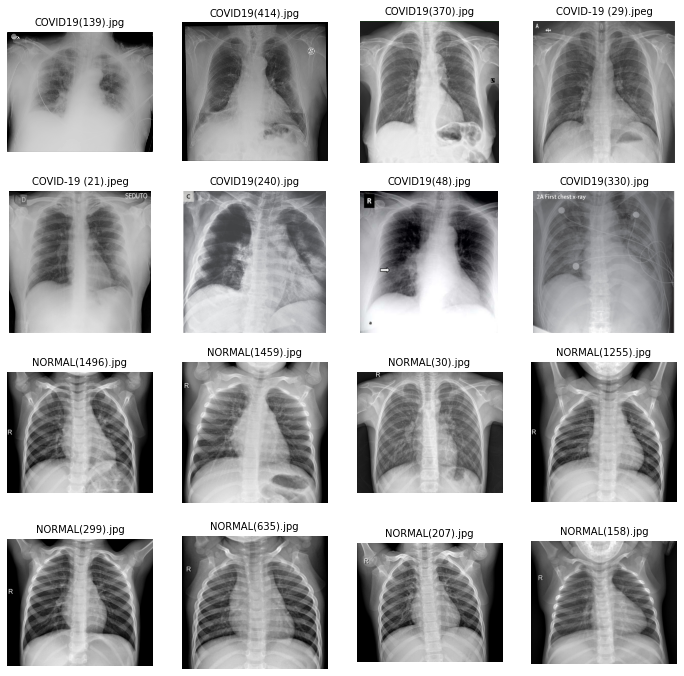

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg


#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic,'    ',normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',)[-1]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [10]:
dgen_train = ImageDataGenerator(featurewise_std_normalization=True,
                                featurewise_center=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip=True,
                                vertical_flip=False)

dgen_test = ImageDataGenerator(featurewise_std_normalization=True,
                                featurewise_center=True,
                                rotation_range=20,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                vertical_flip=False)
                                

seed = 1

train_generator = dgen_train.flow_from_directory(
    train_dir,
    target_size = (300,300),
    subset = 'training',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

validation_generator = dgen_train.flow_from_directory(
    train_dir,
    target_size = (300,300),
    subset = 'validation',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

test_generator = dgen_test.flow_from_directory(
    test_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.white_list_formats


('png', 'jpg', 'jpeg', 'bmp', 'ppm', 'tif', 'tiff')

In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(300, 300, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5


InvalidArgumentError: ignored

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])

Text(0.5, 0, 'epochs')

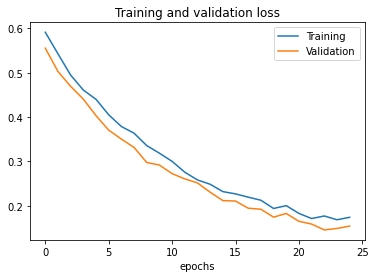

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

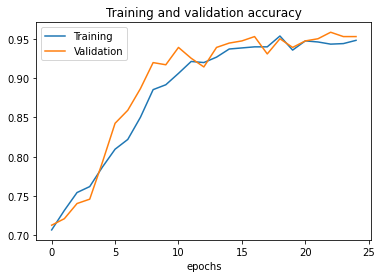

In [16]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
cf = np.array([[430,6],[7,1006]])
print(cf)

[[ 430    6]
 [   7 1006]]


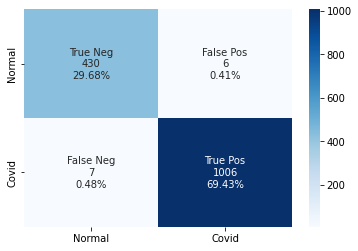

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = np.array([[430,6],[7,1006]])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
categories = ['Normal','Covid']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='',xticklabels=categories,yticklabels=categories, cmap='Blues')






In [ ]:
# get the test acuarcy and loss
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print('test loss : {} test acc : {}'.format(test_loss,test_accuracy))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 20s 1s/step - loss: 0.0622 - accuracy: 0.9855
test loss : 0.06222972273826599 test acc : 0.9855371713638306


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename 
  img = image.load_img(img_path,target_size= (128,128))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  prediction = custom_model.predict(images)
  print(filename)


  if prediction == 0:
    print('Covid detected')
  else:
    print('Your report is normal')



Saving NORMAL(10).jpeg to NORMAL(10).jpeg
NORMAL(10).jpeg
Your report is normal


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet = MobileNetV2(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))
mnet.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [ ]:
def create_model():
  new_model = Sequential([
                          mnet,
                          Flatten(),
                          Dropout(0.5),
                          Dense(1,activation='sigmoid'),
                          ])
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 84s 2s/step - loss: 0.4147 - accuracy: 0.7950 - val_loss: 0.2352 - val_accuracy: 0.9309
Epoch 2/5
46/46 [==============================] - 78s 2s/step - loss: 0.2271 - accuracy: 0.9165 - val_loss: 0.1730 - val_accuracy: 0.9448
Epoch 3/5
46/46 [==============================] - 78s 2s/step - loss: 0.1577 - accuracy: 0.9400 - val_loss: 0.1439 - val_accuracy: 0.9558
Epoch 4/5
46/46 [==============================] - 77s 2s/step - loss: 0.1352 - accuracy: 0.9579 - val_loss: 0.1136 - val_accuracy: 0.9779
Epoch 5/5
46/46 [==============================] - 79s 2s/step - loss: 0.1107 - accuracy: 0.9627 - val_loss: 0.1040 - val_accuracy: 0.9669


In [11]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L

effnet = EfficientNetV2L(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (300,300,3))

effnet.summary()

473186304/473176280 [==============================] - 2s 0us/step
Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                

In [ ]:
def create_model():
  #new_model = Sequential([
  #                        effnet,
  #                        Flatten(),
  #                        Dropout(0.5),
  #                        Dense(1,activation='sigmoid'),
  #                        ])
  new_model = Sequential([
                          effnet,
                          Flatten(),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(64,activation='relu'),
                          Dropout(0.4),
                          Dense(1,activation='sigmoid')])
                        
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.002), loss = 'binary_crossentropy', metrics = ['accuracy','AUC','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               327936    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                      

In [12]:
def create_model():
  initial_learning_rate = 0.002
  lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
  new_model = Sequential([
                          effnet,
                          Flatten(),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(64,activation='relu'),
                          Dropout(0.4),
                          Dense(1,activation='sigmoid')])
                        
  new_model.layers[0].trainable = False
  new_model.compile(SGD(learning_rate=lr_schedule), loss = 'binary_crossentropy', metrics = ['accuracy','AUC','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
"""def exp_decay(epoch,lr):
 "  initial_lrate = 0.1
   k = 0.1
   lrate = lr * exp(-k*t)
   return lrate
lrate = LearningRateScheduler(exp_decay)

In [13]:
history = custom_model.fit(train_generator,
                    epochs = 25,
                    validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/25
46/46 [==============================] - 107s 2s/step - loss: 0.5915 - accuracy: 0.7067 - auc: 0.6812 - precision: 0.7315 - recall: 0.9171 - true_positives: 929.0000 - true_negatives: 95.0000 - false_positives: 341.0000 - false_negatives: 84.0000 - val_loss: 0.5555 - val_accuracy: 0.7127 - val_auc: 0.8818 - val_precision: 0.7087 - val_recall: 1.0000 - val_true_positives: 253.0000 - val_true_negatives: 5.0000 - val_false_positives: 104.0000 - val_false_negatives: 0.0000e+00
Epoch 2/25
46/46 [==============================] - 69s 1s/step - loss: 0.5428 - accuracy: 0.7315 - auc: 0.7730 - precision: 0.7294 - recall: 0.9793 - true_positives: 992.0000 - true_negatives: 68.0000 - false_positives: 368.0000 - false_negatives: 21.0000 - val_loss: 0.5029 - val_accuracy: 0.7210 - val_auc: 0.9372 - val_precision: 0.7147 - val_recall: 1.0000 - val_true_positives: 253.0000 - val_true_negatives: 8.0000 - val_false_positives: 101.0000 - val_false_negatives: 0.0000e+00
Epoch 3/25
46/46 [=====